In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [16]:
filename = '../data/demo_2020_0505.sqlite'

with sqlite3.connect(filename) as con:
    invdf  = pd.read_sql('''select * from inverter_minutely''', con=con)
invdf.LoggedDatetime  = pd.to_datetime(invdf.LoggedDatetime)


In [3]:
invdf = invdf.set_index('LoggedDatetime')

In [4]:
inv1 = invdf.query('DeviceID == 1')
inv2 = invdf.query('DeviceID == 2')

In [29]:
import collections
interval = collections.OrderedDict()
for h in range(5, 18):
    t1 = '2020-05-05 {:02d}:00:00'.format(h)
    t2 = '2020-05-05 {:02d}:00:00'.format(h+1)
    interval[h] = (t1, t2)
#print(interval)
data = []
for k, t in interval.items():
    #print('{}, {}'.format(t[0], t[1]))
    invh = inv1[t[0]:t[1]]
    #print('{} to {}, mean:{:06.3f}, std:{:4.3f}'.format(t[0], t[1], invh.ACOutputPower.mean(), invh.ACOutputPower.std()))
    
    #d = {'hour': t[0], 'mean': invh.ACOutputPower.mean(), 'std': invh.ACOutputPower.std()}
    d = {'hour': k, 'mean': invh.ACOutputPower.mean(), 'std': invh.ACOutputPower.std()}
    data.append(d)
    
df = pd.DataFrame(data)
df = df.set_index('hour')
df

,mean,std
hour,,
5,0.884043,1.202594
6,12.525085,4.993703
7,26.582712,3.191453
8,35.334237,1.889175
9,38.648448,2.708240
10,43.135476,0.579711
11,43.447241,0.564023
12,40.994048,1.668991
13,35.922759,2.071767


           mean       std
hour                     
5      0.884043  1.202594
6     12.525085  4.993703
7     26.582712  3.191453
8     35.334237  1.889175
9     38.648448  2.708240
10    43.135476  0.579711
11    43.447241  0.564023
12    40.994048  1.668991
13    35.922759  2.071767
14    27.708983  3.163081
15    16.836207  3.325154
16     6.705763  2.328282
17     2.262759  0.704123


<AxesSubplot:xlabel='hour'>

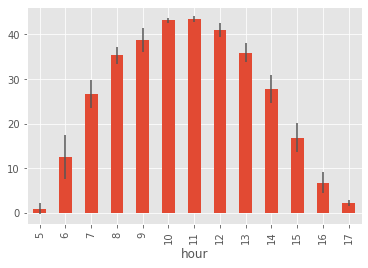

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use("ggplot")
print(df)
df['mean'].plot.bar(yerr=df['std'])
#df.mean
#plt.errorbar(df.index, df.mean, yerr=df.std, fmt='.k')
